# HYPERPARAMETERS AND MODEL VALIDATION

In [ ]:
The first two steps of supervised ML are
1 Choose a class of model                               > import the appropriate estimator class from Scikit-Learn.
2 Choose model hyperparameters                          > instantiate the class with desired values.

# Model Validation

## Hold Out Set

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris['data']
y = iris['target']

# Here we'll use a k-neighbors classifier with n_neighbors=1. 
# This is a very simple and intuitive model that says "the label of an unknown point is the same as the label of its closest training point:"
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

# split the data with 50% in each set
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
from sklearn.metrics import accuracy_score
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

## Model validation via cross-validation

In [ ]:
The issue with Hold Out method is that we have not used a good portion of the dataset for training.
One way to address this is to use cross-validation, where we do sequence of fits where each data subset is used both as a training set and as a validation set

In [7]:
# Here we do two validation trials, alternately using each half of the data as a holdout set. 
# Using the split data from before, we could implement it like this:

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [ ]:
Expanding this 2-Fold cross validation into 5 groups can be done manually or we can use Scikit-Learn cross_val_score convenience routine

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [ ]:
Scikit-Learn implements a number of useful cross-validation schemes that are useful in particular situations.
These are implemented via iterators in the cross_validation module. 

For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points.
Here, we train on all points but one in each trial. This type of cross-validation is known as leave-one-out cross validation, and can be used as follows:

In [11]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
scores.mean()

0.96

## Selecting the best model

In [ ]:
The core importance is the following question: if our estimator is underperforming, how should we move forward? 
    
There are several possible answers:
  - Use a more complicated/more flexible model
  - Use a less complicated/less flexible model
  - Gather more training samples
  - Gather more data to add features to each sample
    
The answer to this question is often counter-intuitive.
  - Sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results
  - The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

### The Bias-Variance trade-off

In [ ]:
Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between bias and variance. 
Consider the following figure, which presents two regression fits to the same dataset:

Text(0.5, 1.0, 'High-variance model: Overfits the data')

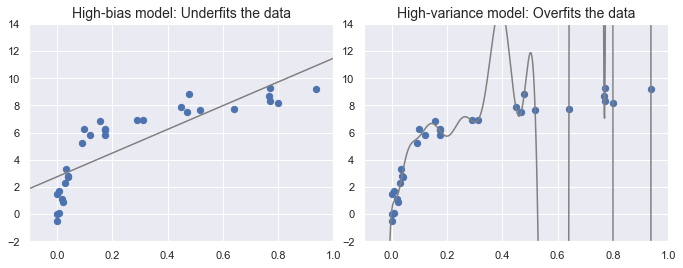

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

def my_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

X, y = my_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1, )

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)

In [ ]:
Now lets add some new data points. The red points indicate data that is omitted from the training set.

Text(0.02, 0.91, 'validation score: $R^2$ = -1.8e+09')

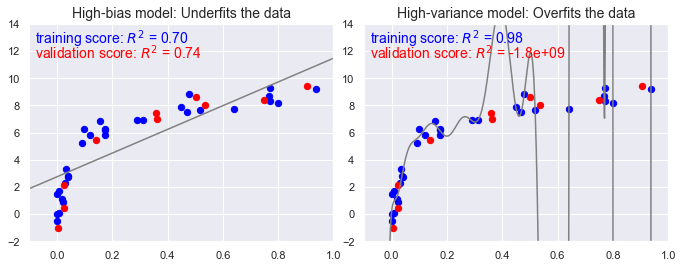

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = my_data(10, rseed=42)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red')

In [ ]:
- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

Text(0.5, 1.0, 'Validation Curve Schematic')

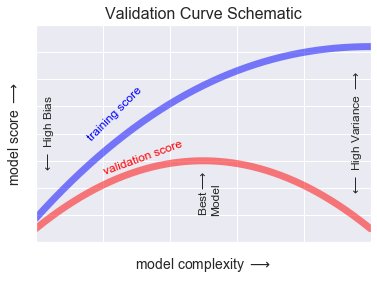

In [43]:
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots()
ax.plot(x, y2, lw=7, alpha=0.5, color='blue')
ax.plot(x, y1, lw=7, alpha=0.5, color='red')

ax.text(0.15, 0.075, "training score", rotation=45, size=12, color='blue')
ax.text(0.2, -0.05, "validation score", rotation=20, size=12, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=12, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=12, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=12, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Validation Curve Schematic", size=16)

In [ ]:
Validation curve (above):
- The training score is everywhere higher than the validation score. This is generally the case
- For very low model complexity (a high-bias model), the training data is under-fit: poor predictor both for the training and new data
- For very high model complexity (a high-variance model), the training data is over-fits and fails for any previously unseen data.
- For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.
- The means of tuning the model complexity varies from model to model

### Best model - an attempt

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [45]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

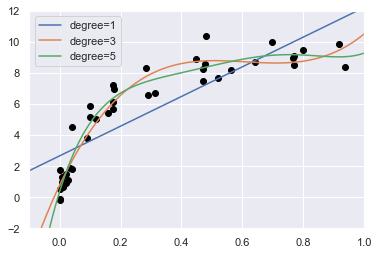

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [ ]:
We can make progress in this by visualizing the validation curve for this particular data and model
  - this can be done straightforwardly using the validation_curve convenience routine provided by Scikit-Learn
  - we just need to provide a model, data, parameter name, and a range to explore
  - this function will automatically compute both the training score and validation score across the range:

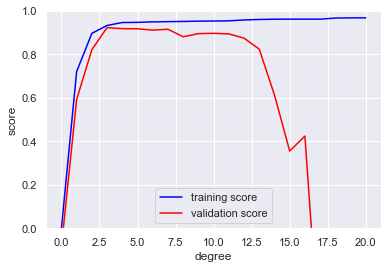

In [58]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [ ]:
This shows precisely the qualitative behavior we expect: 
  - the training score is everywhere higher than the validation score
  - the training score is monotonically improving with increased model complexity
  - the validation score reaches a maximum before dropping off as the model becomes over-fit.

From the validation curve, we can read-off that the optimal trade-off between bias and variance is found for a third-order polynomial.

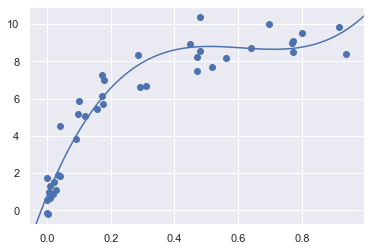

In [49]:
# we can compute and display this fit over the original data as follows:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Learning Curves

In [ ]:
One important aspect of model complexity is that the optimal model will generally depend on the size of your training data. 
For example, lets generate a new dataset with a factor of five more points:

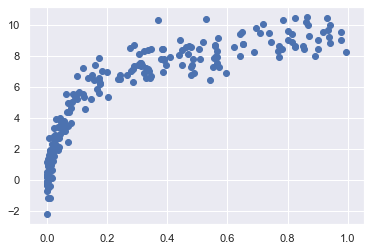

In [60]:
X2, y2 = my_data(200)
plt.scatter(X2.ravel(), y2);

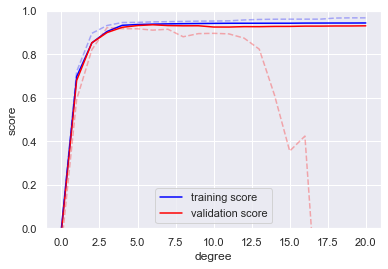

In [61]:
# We will duplicate the preceding code to plot the validation curve for this larger dataset; for reference let's over-plot the previous results as well:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

In [ ]:
The solid lines show the new results, while the fainter dashed lines show the results of the previous smaller dataset. 
It is clear from the validation curve that the larger dataset can support a much more complicated model: 
  - the peak here is probably around a degree of 6
  - even a degree-20 model is not seriously over-fitting the data—the validation and training scores remain very close.

Thus we see that the behavior of the validation curve has not one but two important inputs: 
  - the model complexity 
  - the number of training points.

It is often useful to to explore the behavior of the model as a function of the number of training points.
A plot of the training/validation score with respect to the size of the training set is known as a learning curve.

The general behavior we would expect from a learning curve is this:
  - A model of a given complexity will overfit a small dataset: training score will be relatively high / validation score will be relatively low.
  - A model of a given complexity will underfit a large dataset: training score will decrease / the validation score will increase.
  - A model will never (except by chance) give a better score to the validation set than the training set

With these features in mind, we would expect a learning curve to look qualitatively like that shown in the following figure:

Text(0.5, 1.0, 'Learning Curve Schematic')

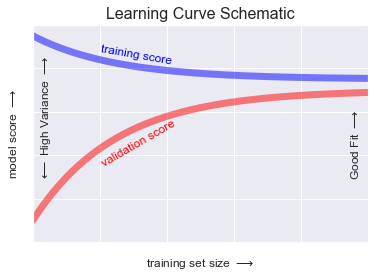

In [67]:
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.2 * np.exp(-4 * N)
y2 = 0.7 - 0.6 * np.exp(-4 * N)

fig, ax = plt.subplots()
ax.plot(x, y2, lw=7, alpha=0.5, color='red')
ax.plot(x, y1, lw=7, alpha=0.5, color='blue')

ax.text(0.2, 0.82, "training score", rotation=-10, size=12, color='blue')
ax.text(0.2, 0.35, "validation score", rotation=30, size=12, color='red')

ax.text(0.98, 0.45, r'Good Fit $\longrightarrow$', size=12, rotation=90, ha='right', va='center')
ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=12, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=12)
ax.set_ylabel(r'model score $\longrightarrow$', size=12)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Learning Curve Schematic", size=16)

In [ ]:
The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows. 
In particular, once you have enough points that a particular model has converged, adding more training data will not help you! 

The only way to increase model performance in this case is to use another (often more complex) model.

### Learning Curves in Scikit-Learn

In [ ]:
Scikit-Learn offers a convenient utility for computing such learning curves from your models.
Here we will compute a learning curve for our original dataset with a second-order polynomial model and a ninth-order polynomial:

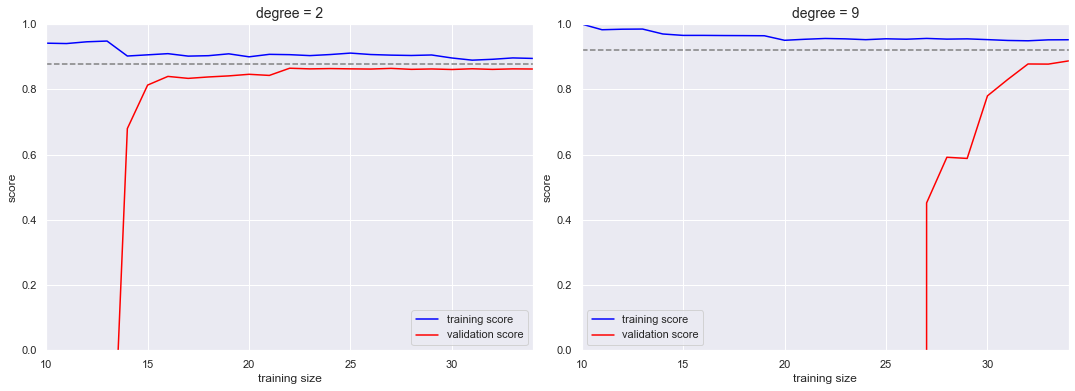

In [69]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),X, y, cv=7,train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [ ]:
This is a valuable diagnostic, because it gives us a visual depiction of how our model responds to increasing training data. 
In particular, when your learning curve has already converged, adding more training data will not significantly improve the fit! 
This situation is seen in the left panel, with the learning curve for the degree-2 model.

The only way to increase the converged score is to use a different (usually more complicated) model. 
We see this in the right panel: by moving to a much more complicated model
  - we increase the score of convergence (indicated by the dashed line), 
  - we incur higher model variance (indicated by the difference between the training and validation scores). 
  - we mitigate this by adding more data points to get the convergence

Plotting a learning curve can help to make this type of decision about how to move forward in improving the analysis.

### Validation in Practice : Grid Search

In [ ]:
In practice, models generally have more than one knob to turn (complexity/data).
Thus plots of validation and learning curves change from lines to multi-dimensional surfaces. 
In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score.

Scikit-Learn provides automated tools to do this in the grid search module. 
Here is an example of using grid search to find the optimal polynomial model. 

We will explore a three-dimensional grid of model features:
  - the polynomial degree
  - the flag telling us whether to fit the intercept
  - the flag telling us whether to normalize the problem. 

This can be set up using Scikit-Learn's GridSearchCV meta-estimator:

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [72]:
# Notice that like a normal estimator, this has not yet been applied to any data. 
# Calling the fit() method will fit the model at each grid point, keeping track of the scores along the way:

grid.fit(X, y);

In [73]:
# Now that this is fit, we can ask for the best parameters as follows:

grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

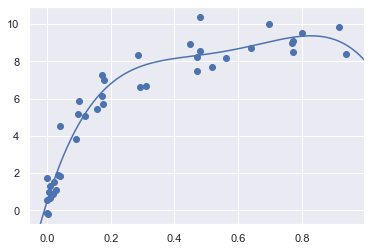

In [75]:
# lets use this then

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);


In [ ]:
The grid search provides many more options, including:
  -  ability to specify a custom scoring function
  - ability to to parallelize the computations
  - ability to do randomized searches, and more
